# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [61]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [62]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [63]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [64]:
# The monthly amount for the member's household income
# YOUR CODE HERE
monthly_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [65]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [66]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE
print(json.dumps(btc_response, indent=4, sort_keys=True))

{
    "data": {
        "1": {
            "circulating_supply": 19270325,
            "id": 1,
            "last_updated": 1674488952,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 439833959593,
                    "percent_change_1h": 0.0744719952581497,
                    "percent_change_24h": -0.0059974843907012,
                    "percent_change_7d": 9.61787257411635,
                    "percentage_change_1h": 0.0744719952581497,
                    "percentage_change_24h": -0.0059974843907012,
                    "percentage_change_7d": 9.61787257411635,
                    "price": 22859.0,
                    "volume_24h": 36271239761
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19270325,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocur

In [67]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE
print(json.dumps(eth_response, indent=4, sort_keys=True))

{
    "data": {
        "1027": {
            "circulating_supply": 120517995,
            "id": 1027,
            "last_updated": 1674489002,
            "max_supply": 120517995,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 195234240264,
                    "percent_change_1h": -0.948688987869653,
                    "percent_change_24h": -1.2376537614531,
                    "percent_change_7d": 4.49268528337301,
                    "percentage_change_1h": -0.948688987869653,
                    "percentage_change_24h": -1.2376537614531,
                    "percentage_change_7d": 4.49268528337301,
                    "price": 1621.02,
                    "volume_24h": 8613991534
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120517995,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_crypt

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [68]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']
# Print the current price of BTC
# YOUR CODE HERE
btc_price

22859.0

In [69]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
# YOUR CODE HERE
eth_price

1621.02

### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [70]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
# YOUR CODE HERE
btc_value

27430.8

In [71]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
# YOUR CODE HERE
eth_value

8591.405999999999

In [72]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
# YOUR CODE HERE
total_crypto_wallet

36022.206

### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [73]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [74]:
# Set the variables for the Alpaca API and secret keys
# YOUR CODE HERE
# YOUR CODE HERE
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
# YOUR CODE HERE
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [75]:
# Set the tickers for both the bond and stock portion of the portfolio

tickers = ['SPY', 'AGG']
# Set timeframe to 1Day

timeframe = '1Day'
# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp('2023-01-20', tz="America/New_York").isoformat()
end_date = pd.Timestamp('2023-01-20', tz="America/New_York").isoformat()




#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [76]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
# YOUR CODE HERE
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df



# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE
spy = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
agg = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE
df_portfolio = pd.concat([spy, agg], axis=1, keys=['SPY', 'AGG'])

# Review the first 5 rows of the Alpaca DataFrame
# YOUR CODE HERE
df_portfolio.head()

SPY                                    \
                            open    high     low   close    volume   
timestamp                                                            
2023-01-20 05:00:00+00:00  390.1  396.04  388.38  395.88  91806356   

                                                      AGG                 \
                          trade_count        vwap    open    high    low   
timestamp                                                                  
2023-01-20 05:00:00+00:00      505915  392.598891  100.17  100.26  99.89   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2023-01-20 05:00:00+00:00  100.09  6095775       18911  100.069086

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [77]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = df_portfolio.loc[:,[('AGG','close')]]

# Print the AGG closing price
# YOUR CODE HERE
agg_close_price

,AGG
,close
timestamp,
2023-01-20 05:00:00+00:00,100.09


In [78]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = df_portfolio.loc[:,[('SPY','close')]]

# Print the SPY closing price
# YOUR CODE HERE
spy_close_price

,SPY
,close
timestamp,
2023-01-20 05:00:00+00:00,395.88


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [79]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price.iat[0,0]

# Print the current value of the bond portfolio
# YOUR CODE HERE
agg_value

20018.0

In [80]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price.iat[0,0]

# Print the current value of the stock portfolio
# YOUR CODE HERE
spy_value

43546.8

In [81]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = spy_value + agg_value

# Print the current balance of the stock and bond portion of the portfolio
# YOUR CODE HERE
total_stocks_bonds

63564.8

In [82]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_stocks_bonds + total_crypto_wallet

# Print current cryptocurrency wallet balance
# YOUR CODE HERE
total_portfolio

99587.006

### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [83]:
# Consolidate financial assets data into a Python list
# YOUR CODE HERE
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
# YOUR CODE HERE
savings_data

[36022.206, 63564.8]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [84]:
# Create a Pandas DataFrame called savings_df 
# YOUR CODE HERE
savings_df = pd.DataFrame(savings_data, columns=['amount'], index=['crypto','stock/bond'])
# Display the savings_df DataFrame
# YOUR CODE HERE
savings_df

,amount
crypto,36022.206
stock/bond,63564.800


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

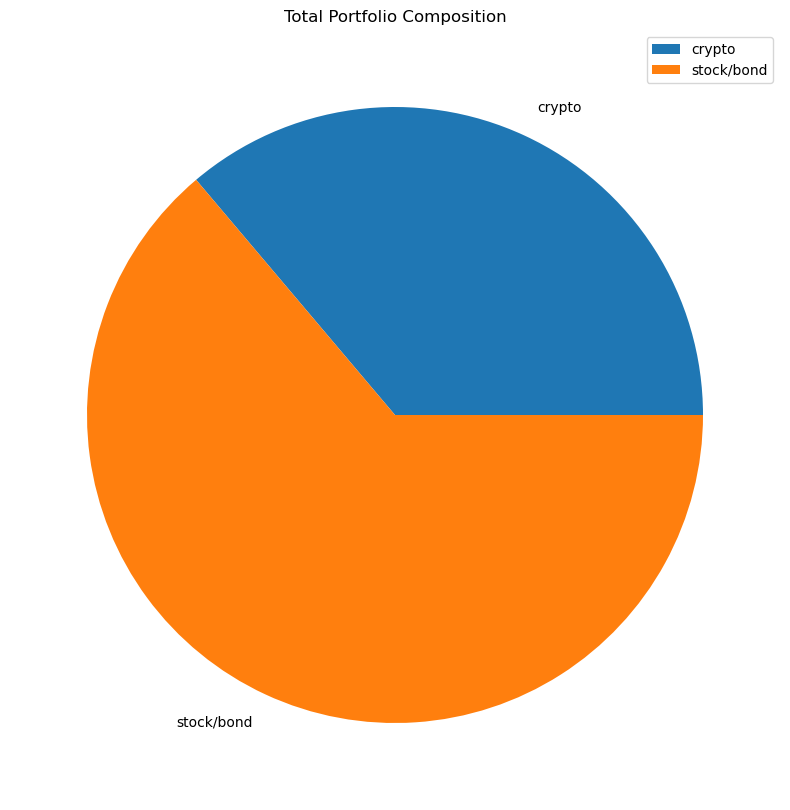

In [85]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
# YOUR CODE HERE
ax = savings_df.plot(kind='pie', y='amount', title="Total Portfolio Composition", figsize=(10,10))
ax.axis('off');


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [86]:
# Create a variable named emergency_fund_value
# YOUR CODE HERE
emergency_fund_value = 3 * monthly_income

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [87]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
# YOUR CODE HERE
# YOUR CODE HERE
# YOUR CODE HERE
if total_portfolio > emergency_fund_value:
    print("Congratulations! You have enough money for an emergency fund")
elif total_portfolio == emergency_fund_value:
    print("Congratulations! Your total fund is equal to the minimum for your emergency fund")
else:
    print(f"Your funding is short ${(emergency_fund_value - total_portfolio):.2f} of meeting your emergency fund needs")


Congratulations! You have enough money for an emergency fund


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [88]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
# YOUR CODE HERE
# YOUR CODE HERE
end_date = pd.Timestamp('2023-01-23', tz="America/New_York").isoformat()
start_date = pd.Timestamp('2020-01-23', tz="America/New_York").isoformat()

In [89]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
# YOUR CODE HERE
df_3years = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df


# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE
spy = df_3years[df_3years['symbol']=='SPY'].drop('symbol', axis=1)
agg = df_3years[df_3years['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE
df_3years = pd.concat([spy, agg], axis=1, keys=['SPY', 'AGG'])

# Display both the first and last five rows of the DataFrame
# YOUR CODE HERE
# YOUR CODE HERE
display(df_3years.head())
display(df_3years.tail())

SPY                                        \
                             open      high       low   close    volume   
timestamp                                                                 
2020-01-23 05:00:00+00:00  330.63  332.1682  329.4100  331.80  51962994   
2020-01-24 05:00:00+00:00  332.44  332.5300  327.3600  328.76  87579833   
2020-01-27 05:00:00+00:00  323.03  325.1200  322.6600  323.51  84062588   
2020-01-28 05:00:00+00:00  325.07  327.8500  323.6038  326.88  63833953   
2020-01-29 05:00:00+00:00  328.38  328.6300  326.4000  326.62  54040963   

                                                      AGG                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2020-01-23 05:00:00+00:00      275918  330.969616  113.64  113.70  113.5800   
2020-01-24 05:00:00+00:00      456515  329.581169  113.68  113.89  113.6700   
2020-01-27 05:00:00+00:00      480422  324.143307  114.14  114.16  114.0470   
2020-01-28 05:00:00+00:00      328817  326.542567  114.10  114.16  113.9501   
2020-01-29 05:00:00+00:00      303785  327.339296  114.13  114.35  114.1108   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2020-01-23 05:00:00+00:00  113.58  3429575       10704  113.632929  
2020-01-24 05:00:00+00:00  113.79  4199784        9623  113.800376  
2020-01-27 05:00:00+00:00  114.14  4790076       12055  114.123364  
2020-01-28 05:00:00+00:00  114.04  4463823       11954  114.028981  
2020-01-29 05:00:00+00:00  114.30  2890247       10583  114.244526

SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2023-01-17 05:00:00+00:00  398.48  400.23  397.06  397.77  62485876   
2023-01-18 05:00:00+00:00  399.01  400.12  391.28  391.49  99651010   
2023-01-19 05:00:00+00:00  389.36  391.08  387.26  388.64  87066127   
2023-01-20 05:00:00+00:00  390.10  396.04  388.38  395.88  91806356   
2023-01-23 05:00:00+00:00  396.72  399.96  395.72  399.81  20592212   

                                                      AGG                   \
                          trade_count        vwap    open     high     low   
timestamp                                                                    
2023-01-17 05:00:00+00:00      436151  398.195099   99.74   99.960   99.65   
2023-01-18 05:00:00+00:00      643581  394.553482  100.76  100.875  100.37   
2023-01-19 05:00:00+00:00      549053  389.264685  100.73  100.730  100.33   
2023-01-20 05:00:00+00:00      505915  392.598891  100.17  100.260   99.89   
2023-01-23 05:00:00+00:00      157374  397.980862   99.80   99.990   99.78   

                                                                      
                              close   volume trade_count        vwap  
timestamp                                                             
2023-01-17 05:00:00+00:00   99.7400  7982214       34158   99.800510  
2023-01-18 05:00:00+00:00  100.7300  7779527       26696  100.664398  
2023-01-19 05:00:00+00:00  100.5000  8633859       23638  100.504973  
2023-01-20 05:00:00+00:00  100.0900  6095775       18911  100.069086  
2023-01-23 05:00:00+00:00   99.9501  1049606        4931   99.896185

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [90]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
# YOUR CODE HERE
MC_30year = MCSimulation(
    portfolio_data = df_3years,
    weights=[.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)
# Review the simulation input data
# YOUR CODE HERE
MC_30year.portfolio_data.head()

SPY                                        \
                             open      high       low   close    volume   
timestamp                                                                 
2020-01-23 05:00:00+00:00  330.63  332.1682  329.4100  331.80  51962994   
2020-01-24 05:00:00+00:00  332.44  332.5300  327.3600  328.76  87579833   
2020-01-27 05:00:00+00:00  323.03  325.1200  322.6600  323.51  84062588   
2020-01-28 05:00:00+00:00  325.07  327.8500  323.6038  326.88  63833953   
2020-01-29 05:00:00+00:00  328.38  328.6300  326.4000  326.62  54040963   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2020-01-23 05:00:00+00:00      275918  330.969616          NaN  113.64   
2020-01-24 05:00:00+00:00      456515  329.581169    -0.009162  113.68   
2020-01-27 05:00:00+00:00      480422  324.143307    -0.015969  114.14   
2020-01-28 05:00:00+00:00      328817  326.542567     0.010417  114.10   
2020-01-29 05:00:00+00:00      303785  327.339296    -0.000795  114.13   

                                                                          \
                             high       low   close   volume trade_count   
timestamp                                                                  
2020-01-23 05:00:00+00:00  113.70  113.5800  113.58  3429575       10704   
2020-01-24 05:00:00+00:00  113.89  113.6700  113.79  4199784        9623   
2020-01-27 05:00:00+00:00  114.16  114.0470  114.14  4790076       12055   
2020-01-28 05:00:00+00:00  114.16  113.9501  114.04  4463823       11954   
2020-01-29 05:00:00+00:00  114.35  114.1108  114.30  2890247       10583   

                                                    
                                 vwap daily_return  
timestamp                                           
2020-01-23 05:00:00+00:00  113.632929          NaN  
2020-01-24 05:00:00+00:00  113.800376     0.001849  
2020-01-27 05:00:00+00:00  114.123364     0.003076  
2020-01-28 05:00:00+00:00  114.028981    -0.000876  
2020-01-29 05:00:00+00:00  114.244526     0.002280

In [91]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 110.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 120.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 130.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 140.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 150.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 160.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 170.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 180.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 190.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 200.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 210.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 220.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 230.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 240.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 250.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 260.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 270.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 280.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 290.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 300.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 310.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 320.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 330.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 340.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 350.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 360.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 370.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 380.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 390.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 400.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 410.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 420.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 430.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 440.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 450.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 460.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 470.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 480.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 490.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996143,0.996851,0.999509,1.005509,1.007281,1.010230,1.003768,1.001722,1.010153,1.000776,...,0.992930,1.003997,1.003357,1.001202,0.996214,1.003982,1.012595,0.985589,0.995765,1.001141
2,0.987258,1.003719,0.979519,1.010062,1.001196,1.005140,1.004340,1.015763,1.000199,0.997031,...,0.998071,1.030338,0.999826,1.011973,0.987331,1.014763,1.015644,0.989311,0.997934,1.000926
3,0.997791,1.009604,0.951365,1.010701,1.008237,1.002516,1.004368,1.024115,0.992255,1.002918,...,1.007202,1.038687,1.000661,1.017076,0.992341,1.003555,1.017391,0.986811,0.990549,0.984954
4,0.990085,1.010190,0.960919,1.002822,1.007614,1.010547,0.999150,1.029978,0.995464,0.999299,...,1.008941,1.032968,0.987843,1.012786,0.990682,1.013745,1.025408,0.992507,1.005922,1.011141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.332296,1.871273,15.559155,1.589917,2.045833,0.950908,1.622642,19.813355,4.206712,3.795420,...,3.968612,3.613186,3.060226,5.732309,8.405150,8.389650,4.740825,3.105337,1.884005,9.333171
7557,1.325932,1.864883,15.674124,1.583173,2.048916,0.941465,1.608338,19.374705,4.115205,3.760997,...,3.935100,3.545575,3.017840,5.743075,8.437885,8.478676,4.738216,3.074749,1.850869,9.386474
7558,1.335584,1.834586,15.693947,1.609593,2.048799,0.929750,1.579322,19.180916,4.046672,3.716933,...,4.012160,3.549695,2.956153,5.641113,8.421904,8.528245,4.705745,3.046297,1.824696,9.512935
7559,1.360273,1.852904,16.010911,1.590640,2.029169,0.941219,1.600703,19.023366,3.951241,3.750734,...,4.091125,3.577723,2.937520,5.721407,8.430484,8.304939,4.685209,3.079511,1.851992,9.703370


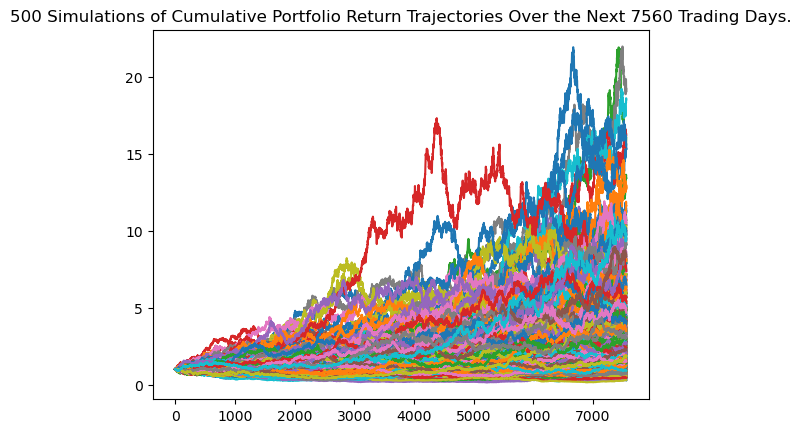

In [92]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE
MC_line_plot = MC_30year.plot_simulation()

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

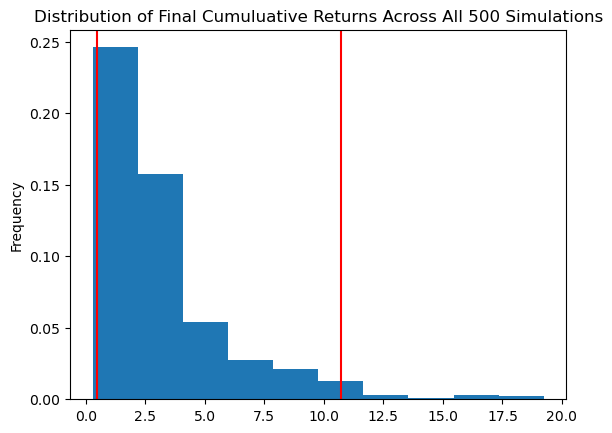

In [93]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE
MC_dist_plot = MC_30year.plot_distribution()

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [94]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE
MC_30year_summary = MC_30year.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
# YOUR CODE HERE
MC_30year_summary

/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           500.000000
mean              3.235561
std               2.871024
min               0.293714
25%               1.348381
50%               2.318338
75%               3.944662
max              19.233462
95% CI Lower      0.486346
95% CI Upper     10.724255
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [95]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE
total_stocks_bonds

63564.8

In [96]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = MC_30year_summary[8] * total_stocks_bonds
ci_upper_thirty_cumulative_return = MC_30year_summary[9] * total_stocks_bonds

# Print the result of your calculations
# YOUR CODE HERE
print(f"There is a 95% chance that the current portfolio value of ${total_stocks_bonds} will result\n in a portfolio value between " 
      f"${ci_lower_thirty_cumulative_return: .2f} and ${ci_upper_thirty_cumulative_return: .2f} at the end of 30 years.")

There is a 95% chance that the current portfolio value of $63564.8 will result
 in a portfolio value between $ 30914.52 and $ 681685.09 at the end of 30 years.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [97]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
# YOUR CODE HERE
MC_10year = MCSimulation(
    portfolio_data = df_3years,
    weights=[.80,.20],
    num_simulation = 500,
    num_trading_days = 252*10
)
# Review the simulation input data
# YOUR CODE HERE
MC_10year.portfolio_data.head()

SPY                                        \
                             open      high       low   close    volume   
timestamp                                                                 
2020-01-23 05:00:00+00:00  330.63  332.1682  329.4100  331.80  51962994   
2020-01-24 05:00:00+00:00  332.44  332.5300  327.3600  328.76  87579833   
2020-01-27 05:00:00+00:00  323.03  325.1200  322.6600  323.51  84062588   
2020-01-28 05:00:00+00:00  325.07  327.8500  323.6038  326.88  63833953   
2020-01-29 05:00:00+00:00  328.38  328.6300  326.4000  326.62  54040963   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2020-01-23 05:00:00+00:00      275918  330.969616          NaN  113.64   
2020-01-24 05:00:00+00:00      456515  329.581169    -0.009162  113.68   
2020-01-27 05:00:00+00:00      480422  324.143307    -0.015969  114.14   
2020-01-28 05:00:00+00:00      328817  326.542567     0.010417  114.10   
2020-01-29 05:00:00+00:00      303785  327.339296    -0.000795  114.13   

                                                                          \
                             high       low   close   volume trade_count   
timestamp                                                                  
2020-01-23 05:00:00+00:00  113.70  113.5800  113.58  3429575       10704   
2020-01-24 05:00:00+00:00  113.89  113.6700  113.79  4199784        9623   
2020-01-27 05:00:00+00:00  114.16  114.0470  114.14  4790076       12055   
2020-01-28 05:00:00+00:00  114.16  113.9501  114.04  4463823       11954   
2020-01-29 05:00:00+00:00  114.35  114.1108  114.30  2890247       10583   

                                                    
                                 vwap daily_return  
timestamp                                           
2020-01-23 05:00:00+00:00  113.632929          NaN  
2020-01-24 05:00:00+00:00  113.800376     0.001849  
2020-01-27 05:00:00+00:00  114.123364     0.003076  
2020-01-28 05:00:00+00:00  114.028981    -0.000876  
2020-01-29 05:00:00+00:00  114.244526     0.002280

In [98]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE
MC_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 110.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 120.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 130.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 140.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 150.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 160.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 170.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 180.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 190.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 200.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 210.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 220.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 230.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 240.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 250.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 260.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 270.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 280.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 290.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 300.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 310.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 320.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 330.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 340.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 350.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 360.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 370.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 380.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 390.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 400.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 410.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 420.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 430.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 440.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 450.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 460.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 470.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 480.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

Running Monte Carlo simulation number 490.


/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCFor

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991468,1.016514,0.988424,1.021605,0.990770,0.985084,1.006396,0.987523,0.996582,1.014344,...,1.006078,1.005433,1.022973,0.985651,0.998170,0.996311,0.982934,0.990567,0.992851,0.993199
2,0.995367,1.018220,0.963342,1.017718,0.992016,0.988170,1.012047,0.968916,1.014414,1.006023,...,0.984246,1.033575,1.013240,0.970080,0.994591,1.001060,0.978186,0.991579,0.974427,0.994633
3,1.005171,1.002547,0.938579,1.020441,1.003234,0.976596,1.046696,0.957698,1.031800,1.007755,...,0.960652,1.030877,1.017992,0.976436,0.999366,1.004307,0.975082,1.008145,0.961592,0.993304
4,0.988578,1.018915,0.926785,1.017162,1.011410,0.969148,1.073192,0.952141,1.046096,1.011388,...,0.977735,1.034930,1.008429,0.984553,0.995593,1.008138,0.954192,0.989399,0.938138,1.011194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.880940,0.580529,1.123969,1.501872,1.150307,1.256860,1.352768,0.872411,1.643045,1.291273,...,1.003888,2.636773,3.236448,2.277522,1.435773,0.738191,1.852044,0.952866,1.400796,1.036738
2517,0.870054,0.579729,1.138892,1.496066,1.160681,1.272391,1.357612,0.864564,1.662983,1.296703,...,1.000321,2.632591,3.196598,2.265114,1.434980,0.741140,1.839165,0.962087,1.380465,1.037198
2518,0.869925,0.578519,1.159800,1.472003,1.170485,1.254627,1.350286,0.886815,1.643198,1.296892,...,0.997441,2.670261,3.222718,2.250365,1.425246,0.730508,1.826037,0.973411,1.401708,1.050020
2519,0.867118,0.572782,1.161408,1.465664,1.179306,1.256642,1.371690,0.893686,1.675032,1.291236,...,1.018668,2.608120,3.284141,2.257647,1.409490,0.734092,1.834676,0.969766,1.423271,1.047800


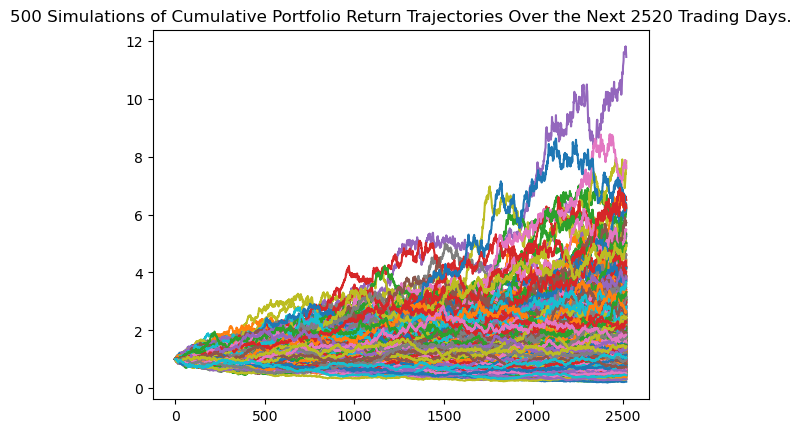

In [99]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE
MC_line_plot_10year = MC_10year.plot_simulation()

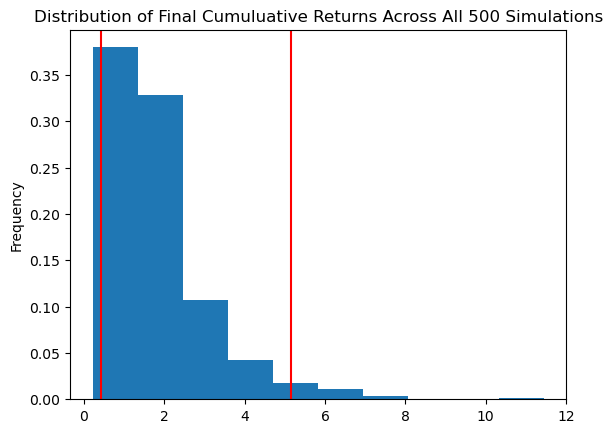

In [100]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE
MC_dist_plot_10year = MC_10year.plot_distribution()

In [101]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE
MC_10year_summary = MC_10year.summarize_cumulative_return()



# Review the 10-year Monte Carlo summary statistics
# YOUR CODE HERE
MC_10year_summary

/Users/thomas/Library/CloudStorage/Dropbox/FinTechBootcamp/Module5/moduel5_challenge/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           500.000000
mean              1.829463
std               1.260130
min               0.227027
25%               1.011674
50%               1.506057
75%               2.238001
max              11.441310
95% CI Lower      0.436247
95% CI Upper      5.144080
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [102]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE
total_stocks_bonds

63564.8

In [103]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = MC_10year_summary[8] * total_stocks_bonds
ci_upper_ten_cumulative_return = MC_10year_summary[9] * total_stocks_bonds

# Print the result of your calculations
# YOUR CODE HERE
print(f"There is a 95% chance that the current portfolio value of ${total_stocks_bonds} will result\n in a portfolio value between " 
      f"${ci_lower_ten_cumulative_return: .2f} and ${ci_upper_ten_cumulative_return: .2f} at the end of 10 years.")

There is a 95% chance that the current portfolio value of $63564.8 will result
 in a portfolio value between $ 27729.96 and $ 326982.43 at the end of 10 years.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

# **Answer** 
After 10 years the potential size of the portfolio will not be sufficient for a comfortable retirement.


In [ ]:
27729.96 and $ 326982.43

There is a 95% chance that the current portfolio value of $63564.8 will result
 in a portfolio value between $ 30914.52 and $ 681685.09 at the end of 30 years.